In [79]:
import pandas as pd
import numpy as np

In [148]:
#import data
path = '../data/'
data = pd.read_csv(path + 'Clean_data.csv')

In [149]:
Y = data[['Volume.of.Hemorrhage.(ml)']].values

In [150]:
#Volume of hemorrhage is column 11
X = np.hstack([data.values[:,1:9], data.values[:,10:data.shape[1]]])

In [151]:
#remove shit
X[X == 'not visible'] = 0
X[X == '0 therapiert'] = 0
X[X == 'Mean time'] = 0

In [241]:
X = X.astype('float')
Y = Y.astype('float')

In [242]:
X

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 4.1024e+04,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 3.9360e+04,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 2.0000e+00, ..., 0.0000e+00, 4.0896e+04,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 3.8496e+04,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 8.0000e+01, ..., 0.0000e+00, 4.1024e+04,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [243]:
X = np.nan_to_num(X)
Y = np.nan_to_num(Y)

In [244]:
X

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 4.1024e+04,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 3.9360e+04,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 2.0000e+00, ..., 0.0000e+00, 4.0896e+04,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 3.8496e+04,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 8.0000e+01, ..., 0.0000e+00, 4.1024e+04,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [245]:
Y

array([[13.8984375 ],
       [60.        ],
       [ 0.60009766],
       [81.125     ],
       [31.40625   ],
       [52.09375   ],
       [39.6875    ],
       [ 1.79980469],
       [ 2.19921875],
       [15.8984375 ],
       [ 7.6015625 ],
       [ 3.90039062],
       [ 0.        ],
       [25.796875  ],
       [ 5.80078125],
       [22.296875  ],
       [ 0.        ],
       [ 5.1015625 ],
       [ 2.19921875],
       [ 0.60009766],
       [ 0.        ],
       [ 0.60009766],
       [ 0.79980469],
       [15.796875  ],
       [11.1015625 ],
       [12.3984375 ],
       [ 1.59960938],
       [58.59375   ],
       [ 0.19995117],
       [10.5       ],
       [ 6.        ],
       [12.        ],
       [36.5       ],
       [39.09375   ],
       [ 1.40039062],
       [ 3.40039062],
       [ 0.        ],
       [21.90625   ],
       [43.8125    ],
       [69.1875    ],
       [25.40625   ],
       [ 0.        ],
       [32.5       ],
       [ 0.        ],
       [13.6015625 ],
       [32

In [246]:
#try to make correlation plot
import seaborn as sns
sns.set(font_scale= 1.5)

In [247]:
cm = np.corrcoef(X.T)
                 

In [248]:
cm

array([[ 1.        ,  0.00508102, -0.17681802, ..., -0.12479126,
         0.13881194,  0.73672252],
       [ 0.00508102,  1.        , -0.04610989, ..., -0.20638883,
         0.21537763,  0.09166985],
       [-0.17681802, -0.04610989,  1.        , ..., -0.03810444,
         0.06368552, -0.21530012],
       ...,
       [-0.12479126, -0.20638883, -0.03810444, ...,  1.        ,
         0.02181878, -0.14294834],
       [ 0.13881194,  0.21537763,  0.06368552, ...,  0.02181878,
         1.        ,  0.11406794],
       [ 0.73672252,  0.09166985, -0.21530012, ..., -0.14294834,
         0.11406794,  1.        ]])

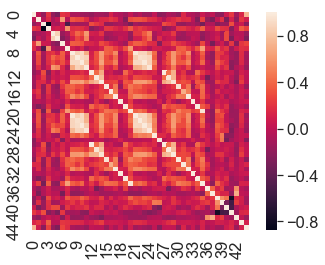

In [249]:
hm = sns.heatmap(cm,cbar = True, square = True)
plt.show()

In [250]:
#linear regression 
import statsmodels.api as sm

In [251]:
model = sm.OLS(Y,X).fit()

In [252]:
names = np.hstack([data.columns.values[1:9], data.columns.values[10:47]])

In [253]:
names

array(['Surgery', 'Embo', 'Time.between.H.and.DSA',
       'Time.between.H.and.DSA.<.7.days', 'Time.between.1st.and.2nd.DSA',
       'Time.between.1st.and.last.DSA', 'Date.of.1st.EVT',
       'Take.really.part.to.the.study.(no.previous.TTT,.less.than.6.days.between.H.and.DAS,.more.than.5.days.between.1st.and.2nd.DAS)',
       '1st.DSA.Nidus.height.(mm)', '1st.DSA.Nidus.width.(mm)',
       '1st.DSA.Nidus.depth.(mm)', '1st.DSA.Nidus.Volumen.(ml)',
       '1st.DSA.Venous.drainage;.0=superficial;.1=deep',
       '1st.DSA.eloquence;.0=No;.1=yes', '1st.DSA.Spetzler-Martin.Grade',
       'flow-associated.aneurysm.of.feeding.artery;.0=No;.1=yes',
       'obvious.intranidal.aneurysm;.0=No;.1=yes',
       'venous.outpouching.of.main.draining.vein.(>10.mm.and.discrepancy.to.prox.and.dist.vein.2:1a;.0=No;.1=yes',
       'venous.stenosis.(70%);.0=No;.1=yes',
       'deep.feeding.artery./.perforating.artery;.0=No;.1=yes',
       'en.passant.vessels;.0=No;.1=yes', '2nd.DSA.Nidus.height.(mm)',
       

In [254]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     3.922
Date:                Sun, 24 Feb 2019   Prob (F-statistic):            0.00142
Time:                        15:14:03   Log-Likelihood:                -205.63
No. Observations:                  59   AIC:                             493.3
Df Residuals:                      18   BIC:                             578.4
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6789      8.878      0.414      0.683     -14.973      22.330
x2            -1.7098     11.413     -0.150      0.883     -25.688      22.268
x3            -0.0932      0.342     -0.272      0.788      -0.812       0.625
x4           -10.2789     32.267     -0.319      0.754     -78.070      57.512
x5             0.0388      0.072      0.538      0.597      -0.113       0.190
x6            -0.0125      0.059     -0.211      0.835      -0.137       0.112
x7             0.0003      0.000      1.009      0.326      -0.000       0.001
x8             4.8529     12.819      0.379      0.709     -22.079      31.785
x9            -0.6362      1.402     -0.454      0.655      -3.581       2.309
x10           -1.0195      2.097     -0.486      0.633      -5.426       3.387
x11           -3.4020      2.635     -1.291      0.213      -8.937       2.133
x12           -0.7925      0.507     -1.564      0.135      -1.857       0.272
x13          -14.6066      8.060     -1.812      0.087     -31.540       2.327
x14           69.6616     52.877      1.317      0.204     -41.429     180.752
x15          -14.7417     23.787     -0.620      0.543     -64.716      35.233
x16          -45.6212     29.331     -1.555      0.137    -107.244      16.002
x17           -2.6461     10.656     -0.248      0.807     -25.034      19.742
x18           -3.5051      5.322     -0.659      0.518     -14.686       7.676
x19           15.2881      6.901      2.215      0.040       0.790      29.786
x20           -0.9930      5.101     -0.195      0.848     -11.711       9.725
x21           -3.0108     34.342     -0.088      0.931     -75.160      69.139
x22           -0.1053      1.617     -0.065      0.949      -3.502       3.291
x23            0.0535      1.927      0.028      0.978      -3.994       4.101
x24            3.8902      2.175      1.788      0.091      -0.680       8.460
x25            0.9647      0.638      1.511      0.148      -0.376       2.306
x26           -1.8766      1.286     -1.459      0.162      -4.579       0.826
x27            0.0664      0.111      0.598      0.557      -0.167       0.300
x28          -14.6066      8.060     -1.812      0.087     -31.540       2.327
x29         -109.8752     58.231     -1.887      0.075    -232.214      12.464
x30           44.7277     28.065      1.594      0.128     -14.234     103.689
x31           49.1900     31.776      1.548      0.139     -17.568     115.948
x32            9.7405     11.295      0.862      0.400     -13.989      33.470
x33           -3.5051      5.322     -0.659      0.518     -14.686       7.676
x34           15.2881      6.901      2.215      0.040       0.790      29.786
x35           -0.9930      5.101     -0.195      0.848     -11.711       9.725
x36           -5.5327     33.271     -0.166      0.870     -75.432      64.366
x3

In [230]:
lr.coef_

array([[ 3.68346832e+00, -1.75449102e+00, -9.27394238e-02,
        -1.02734132e+01,  3.87740484e-02, -1.20201911e-02,
         2.71389871e-04,  4.85000204e+00, -6.33267250e-01,
        -1.01977121e+00, -3.41445832e+00, -7.92701152e-01,
        -1.45887939e+01,  6.95816726e+01, -1.46024225e+01,
        -4.55476506e+01, -2.68373742e+00, -3.52372753e+00,
         1.52904295e+01, -9.93955297e-01, -2.86306724e+00,
        -1.06853315e-01,  5.67175090e-02,  3.89941358e+00,
         9.64769680e-01, -1.87719397e+00,  6.60796392e-02,
        -1.45887939e+01, -1.09789063e+02,  4.45725432e+01,
         4.91494062e+01,  9.77435587e+00, -3.52372753e+00,
         1.52904295e+01, -9.93955297e-01, -5.65919613e+00,
        -2.95411818e+01,  4.04465174e+01,  4.74443059e+00,
        -3.32739964e+01,  9.27638052e+00, -1.94069806e+01,
        -3.92698852e+01,  3.75337031e-04,  4.58594184e+00]])